# Dataset Description

The main agenda of this project is to predict the survival rate of the people who were in the titanic ship and the columns present in the dataset are described as follows:

1.PassengerId: unique id number to each passenger

2.Survived: passenger survive(1) or died(0)

3.Pclass: passenger class

4.Name: name of the passengers

5.Sex: gender of passenger

6.Age: age of passenger

7.SibSp: number of siblings/spouses

8.Parch: number of parents/children

9.Ticket: ticket number

10.Fare: cost of the ticket 

11.Cabin: cabin category

12.Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


As the survival rate is featured as categorical data, we need to do classification process

In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Project Datasets/titanic_train.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape  #Checking out the dimensions of the data

(891, 12)

The dataset has 891 rows and 12 columns

# Data Preparation

In [4]:
#Statistical Summary of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:

1.There are outliers in the data as there is a high difference between max and min value

2.Most of the data has 0 values in the dataset and they are not required in the analysis process and we can remove them.

In [5]:
df.info()  #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are Columns containing Categorical data and we need to encode it

In [6]:
df.isnull().sum()   #Checking for null values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values in Age, Cabin and Embarked columns and we need to handle it

# Exploratory Data Analysis

# Univariate Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Importing data visualization libraries seaborn and matplotlib

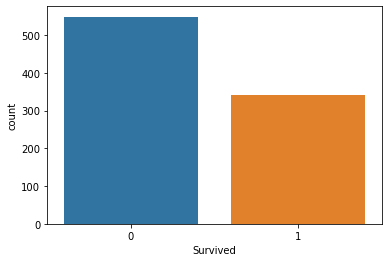

In [8]:
#Checking out the survivors data by plotting countplot
sns.countplot(x='Survived',data=df)

Here, more than 500 people are not survived whereas nearly 300+ people are survived

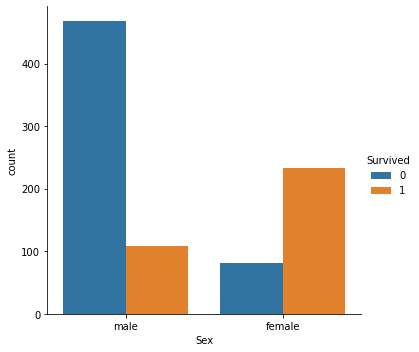

In [9]:
#Checking the number of male and female survivors in the ship
sns.catplot(x='Sex',hue='Survived',kind='count',data=df)

As we can see, the percentage of male survival rate is very less than female and we need to do further analysis in order to predict the survival rate

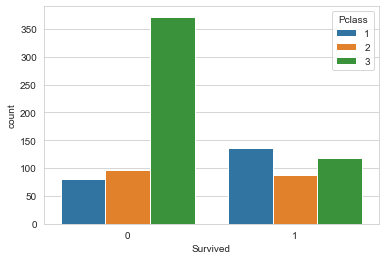

In [10]:
#Based on the passenger class, check the survived people using countplot
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

There are 3 passenger classes and based on that, we can see the number of people who are survived or not

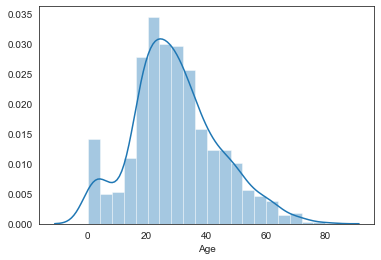

In [11]:
#Checking out distance plot of age column
sns.set_style('white')
sns.distplot(df['Age'])
plt.show()

The data is nearly normally distributed in Age

# Bivariate Analysis

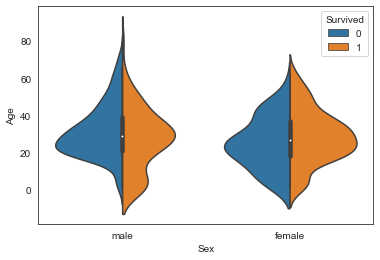

In [12]:
#Violinplot displays the distrbution of data across all the level of category.
#Doing bivariate analysis by taking x as sex and y as age.
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

The above graph gives the summary of the age range of men, women and children.

The survival rate is good for children, high for women in age between 20-50 and less for men at age above 60

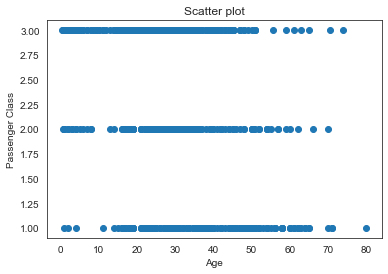

In [13]:
#Plotting Scatterplot
plt.scatter(df['Age'],df['Pclass'])
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Passenger Class')
plt.show()

# Multivariate Analysis 

In [14]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


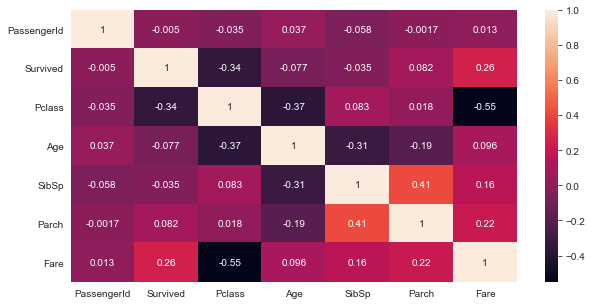

In [15]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)
plt.show()

Observations:

1.The highest percentage of correlation is with Parch column and it is nearly 41%.

2.Most of the data has very less correlation as the relationship is not strong between them.

3.The positively correlated columns will have high impact on target variable, whereas the negatively correlated columns will have less impact or zero impact on the target column

# Handling the dataset

In [16]:
#Dropping the columns that are not required for analysis

#we can see that there is no impact of Ticket, Cabin, Name and PassengerId so that we can drop them from the dataset
df.drop(columns=['Ticket','Cabin','Name','PassengerId'],inplace=True)

In [17]:
df.head()   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
#Checking NaN values after dropping some columns
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Using SimpleImputer for replacing NaN values

In [19]:
#Importing SimpleImputer
from sklearn.impute import SimpleImputer
SI= SimpleImputer(strategy='most_frequent')
df['Embarked']=SI.fit_transform(df['Embarked'].values.reshape(-1,1))

For Embarked column, we are replacing NaN values by the most frequently used data

In [20]:
# For Age column, fill all the NaN valuse with the mean value
SI= SimpleImputer(strategy='mean')
df['Age']=SI.fit_transform(df['Age'].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [21]:
#Checking NaN values after replacing
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

After replacing NaN values, we can see that there is no missing data in the dataset

# Encoding Categorical data

As the Sex and Embarked columns has categorical data, we can convert it into numerical data by using LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'].astype(str))
df['Embarked']=le.fit_transform(df['Embarked'].astype(str))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


The columns has been encoded as labels in alphabetical order. 

In Sex, 0 means female and 1 means male and in Embarked column, 0 means Cherbourg(C), 1 means Queenstown(Q) and 2 means Southampton(S).

# Checking skewness of the data

In [23]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

There are both left and right skewness present in the data and we need to handle them

# Checking Outliers

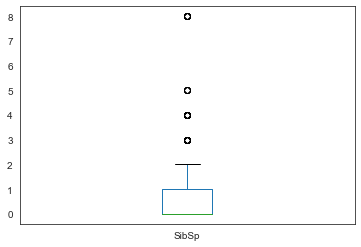

In [24]:
#Checking outliers using boxplot
df['SibSp'].plot.box()   #For SibSp column

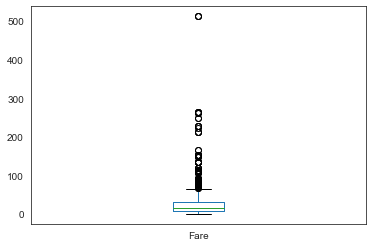

In [25]:
#For fare column
df['Fare'].plot.box()

As there are outliers present in the dataset, we can handle them by using z-score method

# Handling outliers using z-score

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute value
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [27]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [28]:
df.shape   #Original dataset dimensions

(891, 8)

In [29]:
df_new.shape   #New dataset dimensions

(820, 8)

Nearly 70 rows had skewness ans it has been removed using z-score

# Percentage loss of data while removing outliers

In [30]:
percentage_loss=((71)/891)*100
print(percentage_loss)

7.968574635241302


Nearly 8% of data has been removed after handling outliers

# Preparing dataset for model training

Splitting x and y

In [31]:
x=df_new.drop('Survived',axis=1)   #Independent variables
y=df_new['Survived']    #Dependent or Target Variable

# Removing skewness for transforming data

In [32]:
#Using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #Transforming x data

# Building the model

In [33]:
#Importing required modules and metrices
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [34]:
#finding Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

# Finding the best model

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
maxf1_score(lg,x,y)

random state : 42  and f1 score:  0.7387387387387387
random state : 43  and f1 score:  0.5811965811965812
random state : 44  and f1 score:  0.7317073170731708
random state : 45  and f1 score:  0.688
random state : 46  and f1 score:  0.6785714285714286
random state : 47  and f1 score:  0.7286821705426355
random state : 48  and f1 score:  0.7519999999999999
random state : 49  and f1 score:  0.6371681415929205
random state : 50  and f1 score:  0.765625
random state : 51  and f1 score:  0.711864406779661
random state : 52  and f1 score:  0.7692307692307692
random state : 53  and f1 score:  0.7175572519083969
random state : 54  and f1 score:  0.6865671641791045
random state : 55  and f1 score:  0.748091603053435
random state : 56  and f1 score:  0.8032786885245901
random state : 57  and f1 score:  0.7716535433070867
random state : 58  and f1 score:  0.7868852459016394
random state : 59  and f1 score:  0.7086614173228346
random state : 60  and f1 score:  0.6825396825396826
random state : 61 

In [36]:
#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
print("Mean cross val score for logistic classifier: ",cross_val_score(lg,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lg,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg,x,y,cv=5,scoring="f1"))

Mean cross val score for logistic classifier:  0.7250225256772976
standard deviation in f1 score for logistic classifier:  0.020129309842508
[0.75384615 0.72868217 0.703125   0.70175439 0.73770492]


In [37]:
#Using best random stare=95 and finding accuracy score,confusion matrix and classification report
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 95,test_size=0.20,stratify=y)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy score:\n ',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:\n ',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification report:\n')
print(classification_report(y_test,y_pred))

Accuracy score:
  0.8475609756097561


Confusion Matrix:
  [[86 14]
 [11 53]]


Classification report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       100
           1       0.79      0.83      0.81        64

    accuracy                           0.85       164
   macro avg       0.84      0.84      0.84       164
weighted avg       0.85      0.85      0.85       164



# KNeighbors Classifier

In [38]:
#Using Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={'n_neighbors':range(1,30)}
knc=KNeighborsClassifier()
gknc=GridSearchCV(knc,neighbors,cv=10)
gknc.fit(x_train,y_train)
print(gknc.best_params_)    #Best parameter
print(gknc.best_estimator_.n_neighbors)   #Best estimator value
print(gknc.best_score_)    #Best score

{'n_neighbors': 20}
20
0.814009324009324


In [39]:
#Using best parameter and finding accuracy score
knc=KNeighborsClassifier(n_neighbors=20)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
print("Accuracy score for Kneighbors classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy score for Kneighbors classifier on CV data:  0.8109756097560976


In [40]:
#Finding cross val score and SD
print('mean cross val score for KneighborsClassifier:',cross_val_score(knc,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for KneighborsClassifier:',cross_val_score(knc,x,y,cv=5,scoring='accuracy').std())

mean cross val score for KneighborsClassifier: 0.8036585365853659
standard deviation in accuracy score for KneighborsClassifier: 0.022944985027105808


Accuracy is 81% and cross val score is 80% which is good for KNN algorithm

# AdaBoost Classifier

In [41]:
#Using hyperparameter tuning technique and finding out the required values
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
parameters={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
adc=GridSearchCV(estimator=adc,param_grid=parameters,cv=5)
adc.fit(x_train,y_train)
print(adc.best_params_)
print(adc.best_score_)

{'learning_rate': 0.1, 'n_estimators': 2000}
0.7941707147814018


In [42]:
#Using best learning rate and estimator value
adc=AdaBoostClassifier(learning_rate=0.1,n_estimators=2000)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy for Adaboost Classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for Adaboost Classifier on CV data:  0.8475609756097561


In [43]:
#Finding cross val score and SD
print('mean cross val score for AdaBoostClassifier:',cross_val_score(adc,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for AdaBoostClassifier:',cross_val_score(adc,x,y,cv=5,scoring='accuracy').std())

mean cross val score for AdaBoostClassifier: 0.8012195121951221
standard deviation in accuracy score for AdaBoostClassifier: 0.016178657513928753


# Decision Tree Classifier

In [44]:
# lets find the best parameters of decision tree classifier with grid serach cv
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
grid_param ={'criterion':['gini','entropy']}
gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param, scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result= gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7789382373351839


In [45]:
#Finding accuracy using the best criterion, which is gini
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy for Decision tree classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for Decision tree classifier on CV data:  0.7987804878048781


In [46]:
#Finding cross val score and SD
print('mean cross val score for DecisionTreeClassifier:',cross_val_score(dtc,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for DecisionTreeClassifier:',cross_val_score(dtc,x,y,cv=5,scoring='accuracy').std())

mean cross val score for DecisionTreeClassifier: 0.7524390243902438
standard deviation in accuracy score for DecisionTreeClassifier: 0.043185198072257985


From the above 4 algorithms, we can see that AdaBoost and KNN algorithm are performing well. But in KNN algorithm, it gives better cross val score than AdaBoost so that we are selecting KNN as the final model and also we find that the speed of AdaBoost algorithm is very slow than KNN. Therefore, we predict that KNN model is best.

# Finalise the model 

In [47]:
#finding accuracy score,confusion matrix and classification report
knc=KNeighborsClassifier(n_neighbors=20)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
print('Accuracy score:\n ',accuracy_score(y_test,pred))
print('\n')
print('Confusion Matrix:\n ',confusion_matrix(y_test,pred))
print('\n')
print('Classification report:\n')
print(classification_report(y_test,pred))

Accuracy score:
  0.8109756097560976


Confusion Matrix:
  [[87 13]
 [18 46]]


Classification report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.78      0.72      0.75        64

    accuracy                           0.81       164
   macro avg       0.80      0.79      0.80       164
weighted avg       0.81      0.81      0.81       164



In [48]:
#Calculating Mean squared error and RMSE
import numpy as np
print('Mean squared error is: ',mean_squared_error(y_test,y_pred))
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,pred)))

Mean squared error is:  0.1524390243902439
RMSE is:  0.43476935292624114


# Save the model

In [49]:
import joblib
joblib.dump(knc,'TitanicProject.pkl')

['TitanicProject.pkl']